# Options Pricing

   &nbsp;&nbsp; First of all, let us explain the basic terms which we will be utilizing in the report. 

## Options
   &nbsp;&nbsp; Options are derivative contracts giving the holder the right of buying or selling shares of a stock at a price (strike or exercise) upon which both parties agree. While option holder is not obligated to exercise the option, option writer is required to buy or sell underlying security. Options can give the holder the advantage of leverage. If we are to elaborate on this, we can consider 2 types of options, namely, *Call* and *Put* Options.

#### Call Option
   &nbsp;&nbsp; A call option gives the holder the right of buying underlying security at a spesific price in a time interval determined. A call option can give the holder the leverage if it satisfies the following simple condition:
   
                       Current market value of underlying security > Strike price 

#### Put Option
   &nbsp;&nbsp; A put option gives the holder the right of selling underlying security at a spesific price in a time interval determined. A put option can give the holder the leverage if it satisfies the following simple condition:
   
                       Current market value of underlying security < Strike price 
#### Intrinsic Value  
   &nbsp;&nbsp; When there is a difference between the underlying security price and strike price then intrinsic value comes out. For a *call option* intrinsic value is as below, and vice-versa for a *put option*:
                           
                       Underlying security price - Strike price    
#### Premium
   &nbsp;&nbsp; Premium is the cost the holder pays to the writer to acquire the right provided by the option. Premium value consists of two components which are **[intrinsic value](http://www.investopedia.com/terms/i/intrinsicvalue.asp)** and **[time value](http://www.investopedia.com/terms/t/timevalue.asp)**.
   
#### Time Value
   &nbsp;&nbsp; Time value refers to the price difference between premium and intrinsic value. For instance, if buyer pays the seller \$7,00 for a share of stock(\$700,00 if contract) and intrinsic value of the stock is \$5,00 then time value will be \$2,00. Furthermore, buyers tend to pay the sellers more premium for more remaining time until the expiration date of an option. This leads us to conclude that time increases the likelihood that the stock will be at more profitable position.
   
### Factors of Option Pricing
   &nbsp;&nbsp; It's time to turn our focus on the factors having impact on option pricing. There are mainly six parameters that influence the process of determining option pricing.
    
    1.Underlying Price 
   &nbsp;&nbsp; Current market value of underying security is the most impactful factor on option pricing. Its impact on option types can be summarized in the table given below:
   

| Underlying Price  | Call Price    | Put Price   |
|:-----------------:|:-------------:|:-----------:|
| $\uparrow$        | $\uparrow$    | $\downarrow$|
| $\downarrow$      | $\downarrow$  | $\uparrow$  |

   2.Expected Volatility 
   
   &nbsp;&nbsp; Volatility is to exhibit how much and how fast the price of underlying security has been changing. *Historical volatility* is deduced from the actual data, in other words, actual price changes of underlying. If we train the past data and try to find a possible future volatility, it is called *Implied Volatility*. Relation between expected volatility and option price is, generally, like below:
   
|Expected Volatility| Option Price  |
|:-----------------:|:-------------:|
| $\uparrow$        | $\uparrow$    |                       

  3.Strike Price

   &nbsp;&nbsp; We mentioned that intrinsic value is the difference between underlying price and strike price. Therefore, we can consider strike price as a threshold signifying if option is in-the-money,i.e intrinsic value is positive.
   
  4.Time Until Expiration
  
   &nbsp;&nbsp; The more time until the expiration date the more likelihood that option is further in-the-money. As a consequence of this situation, time value is larger compared to the case of shorter expiration date. And , also, if there is high volatility in price of underlying security then we can expect to have larger time value since there will be fluctuations in the underlying price.  
   
  5.Interest Rate and Dividens
         
     . Interest Rate
         
   &nbsp;&nbsp; Interest rate is the cost of holding money. Therefore if there is high interest rates then call option price will be higher and vice-versa. Summary table given below:

|Interest Rate      | Call Price    | Put Price     |
|:-----------------:|:-------------:|:-------------:|
| $\uparrow$        | $\uparrow$    | $\downarrow$  | 
| $\downarrow$      | $\downarrow$  | $\uparrow$    | 

     . Dividens

   &nbsp;&nbsp; If the underlyings dividend increases then call price decreases and put prices decreases. Relation is summerized below:

|Dividends          | Call Price    | Put Price     |
|:-----------------:|:-------------:|:-------------:|
| $\uparrow$        | $\downarrow$  | $\uparrow$    | 
| $\downarrow$      | $\uparrow$    | $\downarrow$  |

### Modelings

   &nbsp;&nbsp; Plotting historical data is a handy method to try fitting a model to data. By doing this, one can make generalization to adapt the new coming inputs. Therefore, we use some models to find a best theoritical output value given that we have sufficient features to be used. Hence, option traders can consider this theoretical value to make more profitable move. Therefore, there are several models generated for that purpose. Very first, and probably, most well-known option pricing model is *[Black-Scholes](https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model)*.
   
#### Black-Scholes

   &nbsp;&nbsp; Formula is given:
    $$C = SN(d_1) - N(d_2)Ke^{-rt}$$
    $$d_1 = \frac{\ln(\frac{S}{K})+(r + \frac{s^2}{2})t}{\sigma\sqrt{t}}$$
    $$d_2 = d_1-\sigma\sqrt{t}$$           
        
        Variables are explained below:
        C = Call Premium
        S = Current stock price
        t = time until expiration
        K = Option strike price
        r = risk-free interest rate
        N = Cumulative standart normal distribution
$\hspace{1,5cm}\sigma$: Standart deviation

   *Model Assumptions*:   Dividens,r and  $\sigma$ are constant whereas, in reality, this assumption might not hold. Since volatility fluctuates over the life of an option.
   

#### Monte Carlo Method for Option Pricing
    
$$ S_T = S_te^{(r-\frac{\sigma^2}{2})(T-t)+\sigma\sqrt{T-t}\epsilon} $$

.r is  risk free interest rate.

.$\sigma$ is volatility, the annualised standard deviation of a stock's returns.

.(T-t) gives the annualised time to maturity.(in years)

.$S_t$ The price of the underlying asset.

.$\epsilon$ is a random value from standard normal distribution($\mu = 0 , \sigma = 1$)

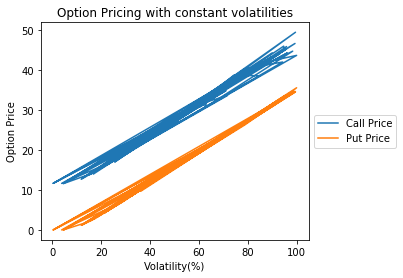

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

def generate_underlying_prices(Param,S0,N,T):
    W = np.sqrt(T)*np.random.standard_normal(N)
    return S0*np.exp(T*(Param['InterestRate']-0.5*Param['Volatility']**2)
+ Param['Volatility']*W);

def call_and_put_payoffs(S_t,Strike):
    return np.maximum(S_t-Strike,0), np.maximum(Strike-S_t,0);

def european(Param,S0,T,Strike,N=10000):
    S_T = generate_underlying_prices(Param,S0,N,T)
    Ct_payoffs,Pt_payoffs = call_and_put_payoffs(S_T,Strike)
    Call_P = sum(Ct_payoffs)/N; Put_P = sum(Pt_payoffs)/N
    return Call_P,Put_P;

def plotPrices(Param):
    vols,calls,puts = [],[],[]
    for i in range(100):
        volatility = rnd.random()
        while(volatility in vols):
            volatility = rnd.random()          
        Param['Volatility'] = volatility
        Price_C, Price_P = european(Param, S0=100, T=1.0, Strike=100);
        #print('European\nCall= ', Price_C,'\n','Put = ', Price_P);   
        vols.append(volatility); calls.append(Price_C); puts.append(Price_P);
    ax = plt.subplot(111)
    line, = ax.plot(np.array(vols)*100,calls, label='Call Price')
    line, = ax.plot(np.array(vols)*100,puts, label='Put Price')
    #plt.xticks(np.arange(min(vols),max(vols),len(vols)))
    #plt.yticks(np.arange(min(np.min(calls),np.min(puts)),max(np.max(calls),np.max(puts)),8))
    plt.title('Option Pricing with constant volatilities')
    plt.ylabel('Option Price')
    plt.xlabel('Volatility(%)')
    
# Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()
    
Param = {'Volatility': 0.25, 'InterestRate': 0.11}
plotPrices(Param);




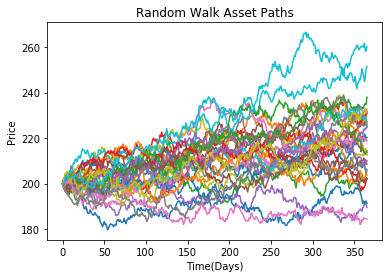

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
 
#Define Variables
T = 365 #Number of trading days 
mu = 0.09 #Return
vol = 0.1 #Volatility
 
daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
 
price_list = [200]
for i in range(30):
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    plt.plot(price_list)
    price_list[:] =[200]
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
plt.title('Random Walk Asset Paths')
plt.ylabel('Price')
plt.xlabel('Time(Days)')    
plt.show()


### Binomial Option Pricing For American Options

   &nbsp;&nbsp; Black-Scholes is one of the most popular models used for options pricing, yet can not be applied to every type of options to obtain more fair price. Binomial option pricing model is another well-known approach to specify fair option prices.
  
   &nbsp;&nbsp; American options differs from European options in a way that they can be exercised before the expiration date. Hence, binomial model will give us the ease of considering option life step-by-step. Implementation of this approach is given below.
       
       Model assumptions: No dividend, risk-free interest rate and constant volatility. 


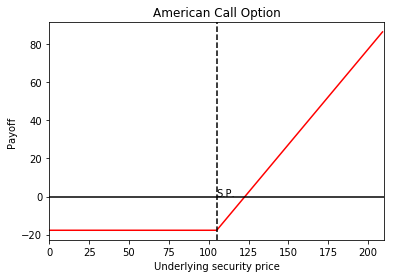

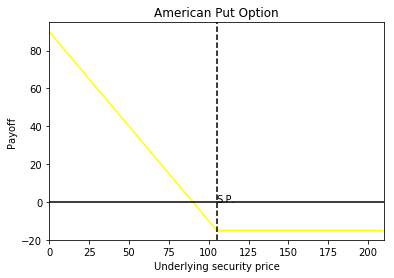

In [3]:
import matplotlib.patches as mpatches

def BinomialOption(S0, K, r, sigma, T, N=10):   
    '''
    S0: Initial value of security
    K: Strike Price
    r: Risk-free interest rate
    sigma: Underlying volatility
    T: Expiration date
    '''
    #calculate delta T    
    dT = float(T) / N
 
    # up and down factors
    u = np.exp(sigma * np.sqrt(dT))
    d = 1.0 / u
 
    #init array
    callPrices =  np.asarray([0.0 for i in range(N + 1)])
    putPrices =  np.asarray([0.0 for i in range(N + 1)])

        
    #security price array
    sec = np.asarray([(S0 * u**j * d**(N - j)) for j in range(N + 1)])
    
 
    #The probability of up and down.
    p = (np.exp(r * dT) - d)/ (u - d)
    q = 1.0 - p
 
   
    # Compute the leaves
    callPrices[:] = np.maximum(sec-K, 0.0)
    putPrices[:] = np.maximum(K-sec, 0.0)
    
   
    #calculate backward the option prices
    for i in range(N-1, -1, -1):
        callPrices[:-1]=np.exp(-r * dT) * (p * callPrices[1:] + q * callPrices[:-1])
        putPrices[:-1]=np.exp(-r * dT) * (p * putPrices[1:] + q * putPrices[:-1])
        sec[:]=sec[:]*u
      
        
        callPrices[:]=np.maximum(callPrices[:],sec[:]-K)
        putPrices[:]=np.maximum(putPrices[:],K-sec[:])
                
    # option price
    return callPrices[0],putPrices[0]

def plotAmericanOptions(S,K,r,v,T):
    [Call,Put]=BinomialOption(100,105,0.09,0.4,T)
    # Call Price Plot
    Y = [-Call] * (K)
    Y += [X - Call for X in range(K)] 
    plt.plot(range(2*K), Y, color='red')
    plt.axis([0, 2*K, min(Y) - 5, max(Y) + 5])
    plt.xlabel('Underlying security price')
    plt.ylabel('Payoff')
    plt.axvline(x=K, linestyle='--', color='black')
    plt.axhline(y=0, color='black')
    plt.title('American Call Option')
    plt.text(K, 0, 'S.P.')
    plt.show()
    # Put Price Plot
    Y2 = [-X + K - Put for X in range(K)] 
    Y2 += [-Put] * (K)
    plt.plot(range(2*K), Y2, color='yellow')
    plt.axis([0, 2*K, min(Y2) - 5, max(Y2) + 5])
    plt.xlabel('Underlying security price')
    plt.ylabel('Payoff')
    plt.axvline(x=K, linestyle='--', color='black')
    plt.axhline(y=0, color='black')
    plt.title('American Put Option')
    plt.text(K, 0, 'S.P.')
    plt.show()

plotAmericanOptions(100,105,0.06,0.4,1);           

### Heston Model
   &nbsp;&nbsp; In finance, the Heston model, named after Steven Heston, is a mathematical model describing the evolution of the volatility of an underlying asset. In this model, we don't have a constant or deterministic volatility. It follows a random process. It is widely used since it fits to real-world case more than Black-Scholes or Binomial does. Differential equation of basic Heston Model is given below:
   
$$dS_t = \mu S_tdt + \sqrt{\nu_t}S_t {dW_t}^S$$   
$$d\nu_t = \kappa(\theta-\nu_t)dt + \xi\sqrt{\nu_t}{dW_t}^\nu$$   

and 

$\scriptstyle dW_{t}^{S},dW_{t}^{{\nu }}$ are Wiener processes with correlation ρ, or equivalently, with covariance ρ dt.

The parameters are the following:

$\mu$ : the rate of return of the asset.
    
$\theta$ : long run average price variance.
    
$\kappa$ : the rate at which $\nu_t$ reverts to $\theta$.
    
$\xi$ : the vol of vol.
    
  Feller Condition: $2\kappa\theta > \xi^2 \longrightarrow \nu _{t} > 0 $
  
   &nbsp;&nbsp; To understand this formula and go further in advance approach, we should review the *Brownian Motion Model*. Its definition and simulation are given in the next section to provide the reader with more insight into the Heston Model.

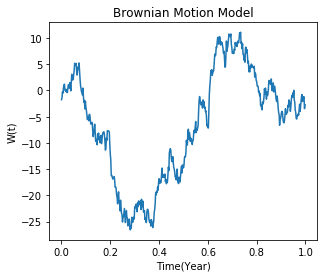

In [52]:
def plotBrownianMotion(N,T):
    #Random seed number
    np.random.seed(100)
    #dw amount of difference btw W(t+1) - W(t)
    dW = np.sqrt(T)*np.random.standard_normal(N)
    #We are vectorizing for efficiency   
    W = np.cumsum(dW)
    ax = plt.subplot(111)
    line, = ax.plot(np.arange(0,T,T/N),W)
    plt.title('Brownian Motion Model')
    plt.ylabel('W(t)')
    plt.xlabel('Time(Year)')
    
# Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    plt.show()

plotBrownianMotion(500,1)    

#### Matrix Representation of Heston Model

$$\begin{bmatrix}
           dS_t \\
           d\nu_t
         \end{bmatrix} =
         \begin{bmatrix}
           \mu S_t \\
           \kappa(\theta - \nu_t) 
         \end{bmatrix} d_t +
         \begin{bmatrix}
           \sqrt{\nu }S_t & 0\\
           0 & \xi \sqrt{\nu_t}
         \end{bmatrix}
         \begin{bmatrix}
           {dW_t}^S \\
           {dW_t}^\nu
         \end{bmatrix} 
$$
$$\begin{bmatrix}
           dS_t \\
           d\nu_t
         \end{bmatrix} =
         \begin{bmatrix}
           \mu S_t \\
           \kappa(\theta - \nu_t) 
         \end{bmatrix} d_t +
         \begin{bmatrix}
           \sqrt{\nu }S_t & 0\\
           0 & \xi \sqrt{\nu_t}
         \end{bmatrix}
          \begin{bmatrix}
           c1 & c2 \\
           0  & c3
         \end{bmatrix} 
         \begin{bmatrix}
           {dW_t}^S \\
           {dW_t}^\nu
         \end{bmatrix} 
$$
$$\begin{bmatrix}
           dS_t \\
           d\nu_t
         \end{bmatrix} =
         \begin{bmatrix}
           \mu S_t \\
           \kappa(\theta - \nu_t) 
         \end{bmatrix} d_t +
         \begin{bmatrix}
           c1\sqrt{\nu }S_t & c2\sqrt{\nu }S_t\\
           0 & c3\xi \sqrt{\nu_t}
         \end{bmatrix}
         \begin{bmatrix}
           {dW_t}^S \\
           {dW_t}^\nu
         \end{bmatrix} 
$$

### Black-Scholes Implied Volatility

In [2]:
from scipy.stats import norm
import datetime
import numpy as np
import matplotlib.pyplot as plt
def find_vol(target_value, call_put, S, K, T, r):
    MAX_IT= 500
    EPSILON = 0.00001

    sigma = 0.5
    for i in range(0, MAX_IT):
        if(sigma == 0):
            return 0
        price = bs_price(call_put, S, K, T, r, sigma)
        vega = bs_vega(call_put, S, K, T, r, sigma)
        price = price
        diff = target_value - price  
        if (abs(diff) < EPSILON):
            return sigma
        sigma = sigma + diff/vega # f(x) / f'(x)
    # value wasn't found, return best guess so far
    return sigma

n = norm.pdf
N = norm.cdf

def bs_price(cp_flag,S,K,T,r,v,q=0.0):
    d1 = (np.log(S/K)+(r+v*v/2.)*T)/(v*np.sqrt(T))
    d2 = d1-v*np.sqrt(T)
    if cp_flag == 'c':
        price = S*np.exp(-q*T)*N(d1)-K*np.exp(-r*T)*N(d2)
    else:
        price = K*np.exp(-r*T)*N(-d2)-S*np.exp(-q*T)*N(-d1)
    return price

def bs_vega(cp_flag,S,K,T,r,v,q=0.0):
    d1 = (np.log(S/K)+(r+v*v/2.)*T)/(v*np.sqrt(T))
    return S * np.sqrt(T)*n(d1)



Implied vol: 72.62%
27.370452239799334
Implied vol: 92.92%
30.895847560111065
Implied vol: 117.56%
36.49897558254831


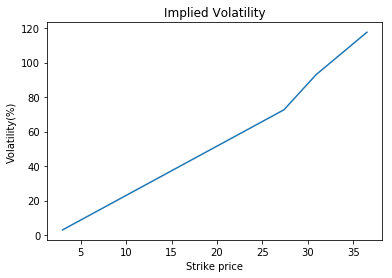

In [36]:
V_market = 1.52
K = 20
T = (datetime.date(2017,3,12) - datetime.date(2017,1,1)).days / 365.
S = 23
r = 0.05
cp = 'c' # call option
vols = [3]
strikes = [3]
for i in range(3):
    K = np.random.uniform(K,45)
    implied_vol = find_vol(V_market, cp, S, K, T, r)
    vols.append(implied_vol*100)
    print ('Implied vol: %.2f%%' % (implied_vol * 100))
    print(K)
    strikes.append(K)
    
plt.plot(strikes,vols)
plt.title('Implied Volatility')
plt.ylabel('Volatility(%)')
plt.xlabel('Strike price')
plt.show()
    #print ('Market price = %.2f' % V_market)
    #print ('Model price = %.2f' % bs_price(cp, S, K, T, r, implied_vol))

### Heston Model Volatility Smile


## Historical Data
   &nbsp;&nbsp; As we mentioned in previous sections, our primary goal is to find an implied volatility. Again, as we know stock prices follow time series , it might be impossible to denote future values, precisely. However, investores, at least, want to be provided with some parameters to obtain as much fair price as they can predict. To satsify this need, first step might be to analyze the *historical data*. Therefore, from now on, I will utilize some useful libraries of python to get and parse the data of some companies like Google ,Tesla etc. Yet, my main goal will be determining an implied volatilty and comparing those values with historical, i.e. realized, volatility.

## Stock Values Since 2016

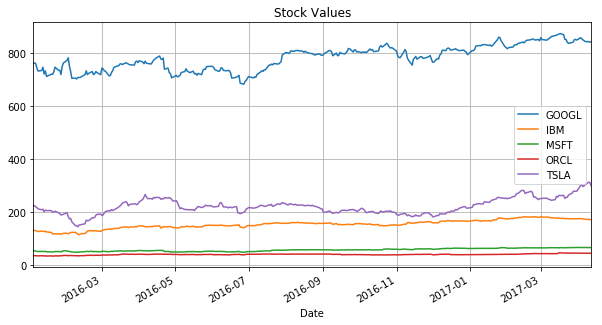

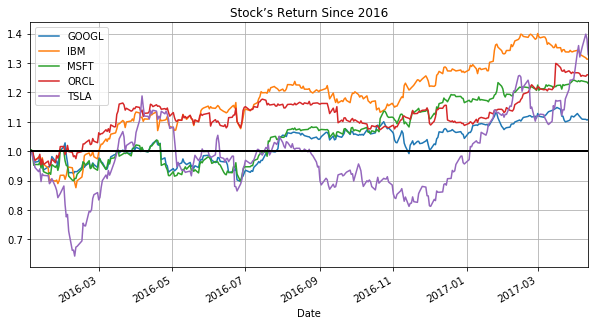

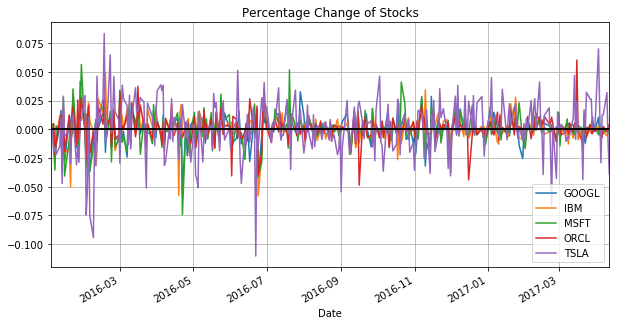

In [1]:
import pandas_datareader.data as web
import datetime 
import pandas as pd
import numpy as np

%matplotlib inline

symbols_list = ['ORCL', 'TSLA', 'IBM', 'MSFT','GOOGL']
#symbols_list = ['TSLA','MSFT','GOOGL']
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime.now()
d = {}
for ticker in symbols_list:
    d[ticker] = web.DataReader(ticker, "yahoo", start, end)
pan = pd.Panel(d)
df = pan.minor_xs('Adj Close')
df.plot(grid = True,title='Stock Values',figsize=(10, 5))
df_return = df.apply(lambda x: x / x[0])
df_return.plot(grid = True,title='Stock’s Return Since 2016',figsize=(10, 5)).axhline(y = 1, color = "black", lw = 2)
df_change = df.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
df_change.plot(grid = True,title='Percentage Change of Stocks',figsize=(10, 5)).axhline(y = 0, color = "black", lw = 2)




## Tesla Stock
   &nbsp;&nbsp; Now, it's time to continue with a stock with which we will play. By considering its historical values, we will obtain a realized volatility. Then we will focus our attention on finding an implied volatility in a given period. As the title denotes, we will anlayze Tesla Stock since we can see that it has a considerable volatility at the last graphic.

In [13]:
import warnings
warnings.filterwarnings("ignore")
from pandas_datareader.data import Options
# Get Options object of Tesla
t = Options('TSLA', 'yahoo')
# Get the very first options that may be exercised 
tesla_data = t.get_call_data().tail()
strike = tesla_data.index[0][0]
expiry_date = tesla_data.index[0][1]
# Convert to datetime
expiry_date = datetime.datetime.strptime(str(expiry_date), "%Y-%m-%d %H:%M:%S")
option_value = tesla_data['Last'][0]
underlying_price = tesla_data['Underlying_Price'][0]
pdr = pd.read_excel('TB3MS.xls')
interest_rate=pdr['VALUE'].values[-1];
deltaT = (expiry_date-datetime.datetime(2017,4,4)).days/365
cp = 'c' # call option
print('Option value: %.2f, Underlying Price: %.2f, Strike: %.1f, deltaT: %.5f, interest-rate: %.2f' %( option_value,  underlying_price, strike, deltaT, interest_rate))
implied_vol = find_vol(option_value, cp, underlying_price, strike, deltaT, interest_rate)
print("İmplied Vol= %.12f" %(implied_vol))
# Printing stock values in given period
up = df_change['TSLA'].index >= datetime.datetime(2017,4,4)
down = df_change['TSLA'].index < datetime.datetime(2017,4,12)
# Hsitorcal Volatility in given period
print("Historical Volatility= %.12f" %(np.std(df_change['TSLA'][up & down].values)*np.sqrt(252)))
ind = df['TSLA'].index >= datetime.datetime(2017,4,1)
df['TSLA'][ind]

Option value: 0.03, Underlying Price: 295.27, Strike: 345.0, deltaT: 0.02466, interest-rate: 0.74
İmplied Vol= 0.344175729014
Historical Volatility= 0.320021002673


Date
2017-04-03    298.519989
2017-04-04    303.700012
2017-04-05    295.000000
2017-04-06    298.700012
2017-04-07    302.540009
2017-04-10    312.390015
2017-04-11    308.709991
2017-04-12    296.839996
Name: TSLA, dtype: float64

In [56]:
from pandas_datareader.data import Options
import datetime 
g = Options('GOOGL', 'yahoo')
print(g.get_call_data().head())
start = datetime.datetime(2017, 1, 3)
end = datetime.datetime(2017,3,3)
# ibm = web.DataReader("TSLA", "yahoo", start, end)
# print(ibm.head())
# i = ibm[['Close']]
# i_c = i.apply(lambda x: (x - x.shift(1))/x.shift(1)) # shift moves dates back by 1.
# np.std(i_c)


                                              Last    Bid    Ask        Chg  \
Strike Expiry     Type Symbol                                                 
740.0  2017-04-13 call GOOGL170413C00740000  91.70  106.3  110.7   0.000000   
760.0  2017-04-13 call GOOGL170413C00760000  94.10   97.3  101.2   0.000000   
770.0  2017-04-13 call GOOGL170413C00770000  73.54   70.8   75.0 -10.769997   
800.0  2017-04-13 call GOOGL170413C00800000  43.20   41.6   44.7  -2.799999   
805.0  2017-04-13 call GOOGL170413C00805000  48.71   36.6   39.8   0.000000   

                                                PctChg   Vol  Open_Int  \
Strike Expiry     Type Symbol                                            
740.0  2017-04-13 call GOOGL170413C00740000   0.000000   8.0       2.0   
760.0  2017-04-13 call GOOGL170413C00760000   0.000000  15.0      11.0   
770.0  2017-04-13 call GOOGL170413C00770000 -12.774282  15.0       4.0   
800.0  2017-04-13 call GOOGL170413C00800000  -6.086955   2.0       2.0   
80

  
   ## References
   .[Options Pricing -Investopedia](http://www.investopedia.com/university/options-pricing/).
   
   .[Black-Scholes -Wikipedia](https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model).
   
   .[Options Pricing -Monte Carlo](http://www.codeandfinance.com/pricing-options-monte-carlo.html).
   
   .[Options Pricing -Monte Carlo and Random Walk](http://www.goddardconsulting.ca/option-pricing-monte-carlo-index.html#MonteCarloEqn)
   
   .[American Options Pricing ](https://en.wikipedia.org/wiki/Binomial_options_pricing_model)
   
   .[Heston Model](https://en.wikipedia.org/wiki/Heston_model)

   
        